In [1]:
include("load_20170915_raman_scatter.jl");

In [2]:
include("raman_scatter_model.jl");

In [3]:
import NaCsCalc.Format: Unc

In [4]:
using PyPlot
using NaCsPlot

In [5]:
using LsqFit

In [6]:
function gen_fit_model(rates, t_prescale)
    f = gen_model(rates, Float64[1, 0, 0, 0, 0, 0, 0, 0])
    function (x, p)
        p[1] .* f.(x .* p[2] .* t_prescale)
    end
end

gen_fit_model (generic function with 1 method)

In [7]:
function fit_and_plot_op(rates, data)
    ts, _ratios, _uncs = NaCsData.get_values(data)
    ratios = _ratios[:, 2]
    uncs = _uncs[:, 2]
    init = Float64[1, 0, 0, 0, 0, 0, 0, 0]
    init_f1 = Float64[0, 0, 0, 0, 0, 1, 0, 0]
    r = sum(rates * init)
    r_f1 = sum(rates * init_f1)
    τ = 1 / r
    τ_f1 = 1 / r_f1
    τ_max = max(τ, τ_f1)
    tmax = maximum(ts)
    t_prescale = 10τ_max / tmax
    model = gen_fit_model(rates, t_prescale)
    pinit = [1.0, 1.0]
    fit = curve_fit(model, ts, ratios, pinit)
    plot_ts = linspace(0, tmax, 1000)
    ys = model(plot_ts, fit.param)
    plot(plot_ts, ys, color="C1")
    errorbar(ts, ratios, uncs, fmt="C0o")
    grid()
    ylim(0, ylim()[2])
    xlim(0, xlim()[2])
    xlabel("\$t (ms)\$")
    nrm, tscale = fit.param
    nrm_s, tscale_s = estimate_errors(fit)
    tscale *= t_prescale
    tscale_s *= t_prescale
    τ_f1_real = τ_f1 / tscale
    τ_f1_real_s = tscale_s / tscale * τ_f1_real
    τ_f2_real = τ / tscale
    τ_f2_real_s = tscale_s / tscale * τ_f2_real
    return (Unc(nrm, nrm_s), Unc(tscale, tscale_s),
            Unc(τ_f1_real, τ_f1_real_s), Unc(τ_f2_real, τ_f2_real_s))
end

fit_and_plot_op (generic function with 1 method)

In [8]:
prefix = "imgs/fit_20170915_rabi_scatter";

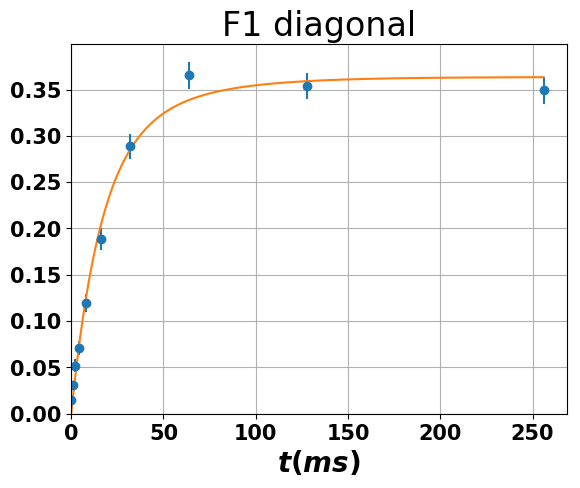

(0.942(46), 3.46(59)e6, 6.3(10), 6.0(10))

In [9]:
res = fit_and_plot_op(rates_f1_diagonal, f1_diagonal)
title("F1 diagonal")
NaCsPlot.save("$(prefix)_f1_diagonal", close=false)
res

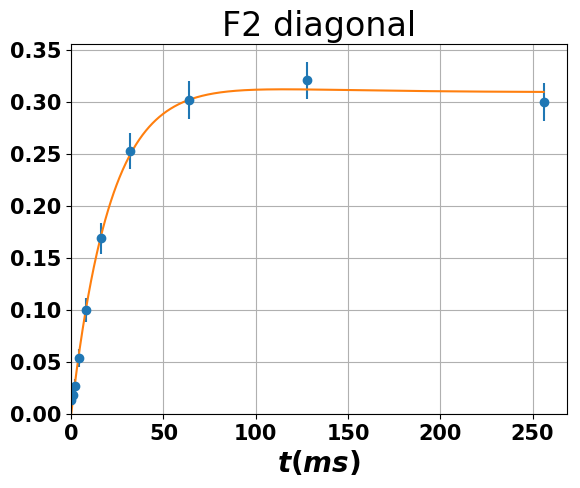

(0.802(20), 2.18(18)e6, 10.38(86), 9.93(82))

In [10]:
res = fit_and_plot_op(rates_f2_diagonal, f2_diagonal)
title("F2 diagonal")
NaCsPlot.save("$(prefix)_f2_diagonal", close=false)
res

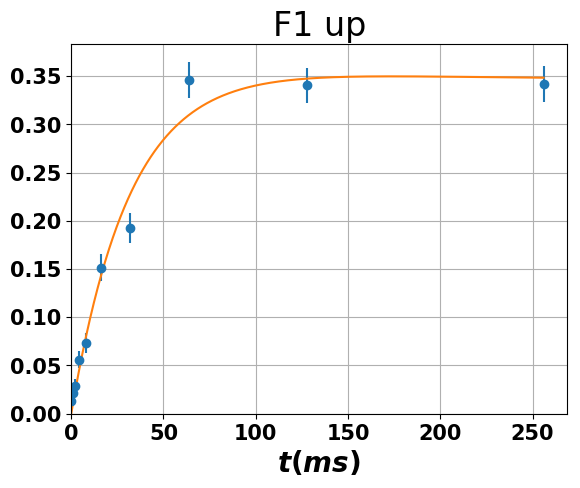

(0.898(67), 1.39(31)e6, 15.6(35), 14.9(33))

In [11]:
res = fit_and_plot_op(rates_f1_up, f1_up)
title("F1 up")
NaCsPlot.save("$(prefix)_f1_up", close=false)
res

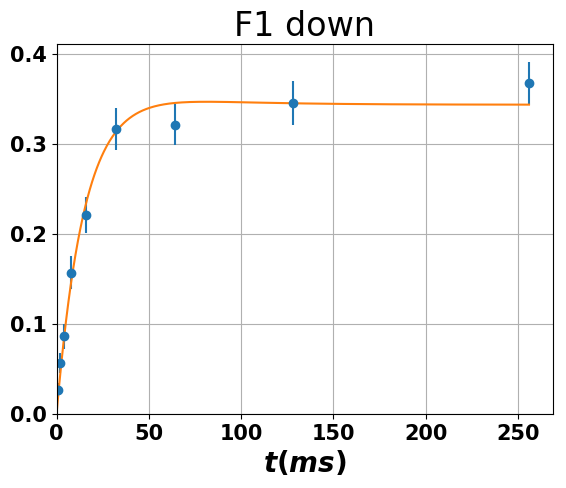

(0.889(45), 2.95(52)e6, 7.3(12), 7.0(12))

In [12]:
res = fit_and_plot_op(rates_f1_down, f1_down)
title("F1 down")
NaCsPlot.save("$(prefix)_f1_down", close=false)
res

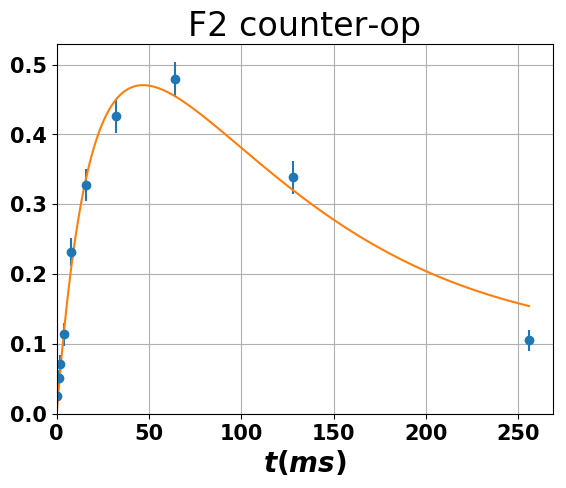

(0.961(55), 3.38(37)e6, 5.59(61), 10.7(11))

In [13]:
res = fit_and_plot_op(rates_f2_counterop, f2_counterop)
title("F2 counter-op")
NaCsPlot.save("$(prefix)_f2_counterop", close=false)
res